In [1]:
import pandas as pd  # For loading data into a tabular format
import numpy as np   # For manipulating data
import matplotlib.pyplot as plt  # For graph plotting
import seaborn as sns  # For graph plotting

# Load the Data

In [2]:
heart_disease = pd.read_csv('../input/heart-disease-dataset/heart.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
heart_disease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Ganti nama kolumnya agar lebih mudah dipahami

In [4]:
heart_disease = heart_disease.rename(columns={'cp':'chest_pain','trestbps':'blood_pressure','chol':'cholestrol','ca':'vessels','fbs':'blood_sugar'})

In [5]:
heart_disease

,age,sex,chest_pain,blood_pressure,cholestrol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Cek untuk mencari Null data

In [6]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1025 non-null   int64  
 1   sex             1025 non-null   int64  
 2   chest_pain      1025 non-null   int64  
 3   blood_pressure  1025 non-null   int64  
 4   cholestrol      1025 non-null   int64  
 5   blood_sugar     1025 non-null   int64  
 6   restecg         1025 non-null   int64  
 7   thalach         1025 non-null   int64  
 8   exang           1025 non-null   int64  
 9   oldpeak         1025 non-null   float64
 10  slope           1025 non-null   int64  
 11  vessels         1025 non-null   int64  
 12  thal            1025 non-null   int64  
 13  target          1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Data Visualization

### Ubah beberapa label agar lebih mudah dipahami dalam membaca grafik dalam visualisasi data

In [7]:
heart_disease2 = heart_disease.copy()
heart_disease2['target'] = heart_disease2['target'].replace({1:'disease',0:'no disease'})
heart_disease2['sex'] = heart_disease2['sex'].replace({1:'Male',0:'Female'})
heart_disease2['chest_pain'] = heart_disease2['chest_pain'].replace({0: "typical_angina", 
                                                                    1: "atypical_angina", 
                                                                    2:"non-anginal pain",
                                                                    3: "asymtomatic"})
heart_disease2['blood_sugar'] = heart_disease2['blood_sugar'].replace({1:True,0:False})
heart_disease2['exang'] = heart_disease2['exang'].replace({1:'Yes',0:'No'})
heart_disease2['thal'] = heart_disease2['thal'].replace({1:'fixed_defect',2:"reversable_defect",3:"normal"})
heart_disease2['slope'] = heart_disease2['slope'].replace({0:'unsloping',1:'flat',2:'downsloping'})

In [8]:
data_barplot = heart_disease2['target'].value_counts()
data_barplot

disease       526
no disease    499
Name: target, dtype: int64

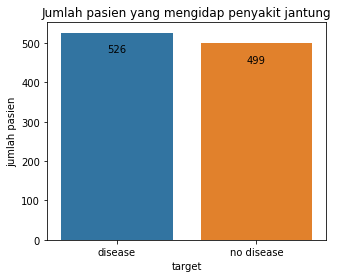

In [9]:
#Visualisasi data jumlah pasien yang sakit jantung
plt.figure(figsize=(5,4))
barplot = sns.barplot(y = data_barplot.values,x=data_barplot.index)
plt.title('Jumlah pasien yang mengidap penyakit jantung')
plt.xlabel('target')
plt.ylabel('jumlah pasien')
for i in range(len(data_barplot)):
    plt.text(i, (data_barplot.values[i]-50), data_barplot.values[i], horizontalalignment='center')
plt.show()

Dari visualisasi tersebut dilihat bahwa penderita sakit jantung lebih banyak daripada yang tidak menderita

### Barplot sex distribution according to target

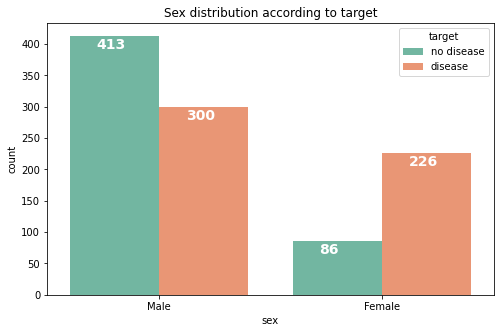

In [10]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(x='sex', data=heart_disease2, hue='target',palette='Set2')
plt.title('Sex distribution according to target')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.12, i.get_height()-20, str(i.get_height()),fontsize=14, color='white',weight='bold',horizontalalignment='left')
plt.show()
    

Dilihat dari grafiknya bahwa pasien pria lebih banyak mengidap penyakit jantung daripada pasien wanita

### Barplot exang according to target

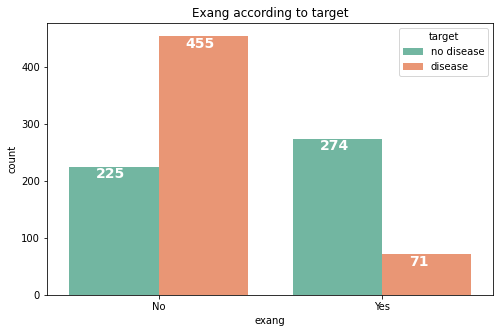

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(x='exang', data=heart_disease2, hue='target',palette='Set2')
plt.title('Exang according to target')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.12, i.get_height()-20, str(i.get_height()),fontsize=14, color='white',weight='bold',horizontalalignment='left')
plt.show()
    

Exang yang no lebih banyak memiliki pasien yang mengidap penyakit jantung daripada yang yes sehingga ketika pasien memiliki exang no lebih beresiko mengidap penyakit jantung

### Barplot Chest_pain distribution according to target

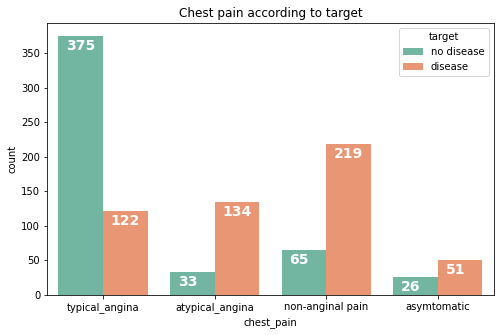

In [12]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(x='chest_pain', data=heart_disease2, hue='target',palette='Set2')
plt.title('Chest pain according to target')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.07, i.get_height()-20, str(i.get_height()),fontsize=14, color='white',weight='bold',horizontalalignment='left')
plt.show()
    

pasien terbanyak pengidap jantung adalah chest pain non-anginal pain dan pasien terbanyak yang tidak mengidap penyakit jantung adalah typical_angina

### Barplot blood sugar according to target

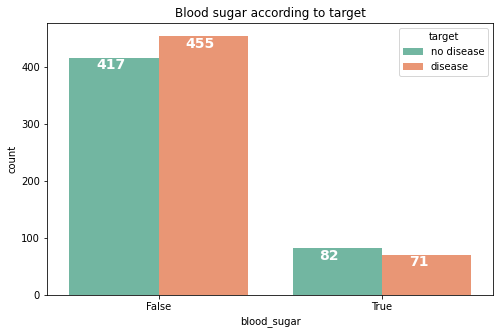

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(x='blood_sugar', data=heart_disease2, hue='target',palette='Set2')
plt.title('Blood sugar according to target')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.12, i.get_height()-20, str(i.get_height()),fontsize=14, color='white',weight='bold',horizontalalignment='left')
plt.show()
    

pasien terbanyak yang mengidap penyakit jantung dan yang tidak adalah yang memiliki gula darah > 120mg/dl

### Barplot slope according to target

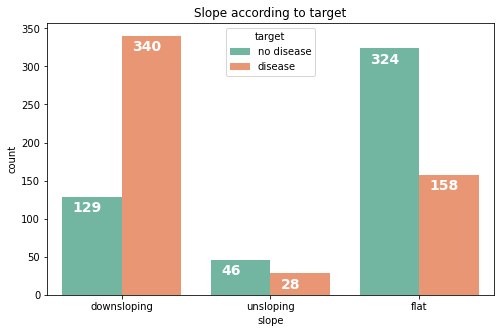

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(x='slope', data=heart_disease2, hue='target',palette='Set2')
plt.title('Slope according to target')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.07, i.get_height()-20, str(i.get_height()),fontsize=14, color='white',weight='bold',horizontalalignment='left')
plt.show()
    

Slope dengan downloping lebih banyak yang mengidap penyakit jantung daripada unsloping slope dan flat sehingga downsloping lebih beresiko mengidap penyakit jantung

### Histogram age according to target

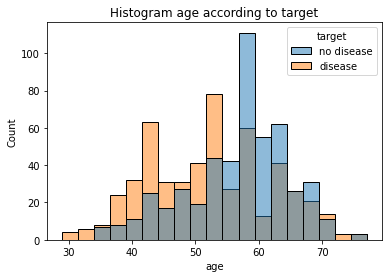

In [15]:
sns.histplot(x='age', data=heart_disease2, hue='target')
plt.title('Histogram age according to target')
plt.show()

Pasieng yang memilik umur lebih dari 40 tahun lebih banyak mengidap penyakit jantung. Maka ketika umur lebih dari 40 tahun akan beresiko lebih mengidap penyakit jantung

### Histogram cholestrol according to age

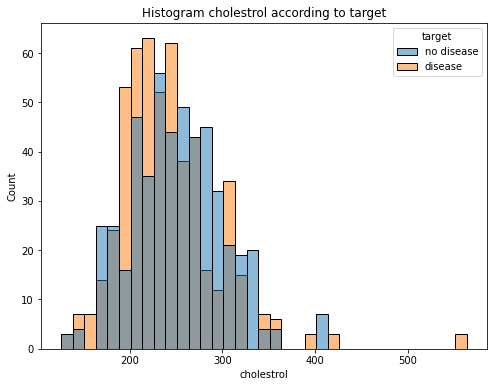

In [16]:
plt.figure(figsize=(8,6))
sns.histplot(x='cholestrol', data=heart_disease2,hue='target')
plt.title('Histogram cholestrol according to target')
plt.show()

Pasien yang memiliki cholestrol >200 dan cholestrol < 400 lebih banyak yang mengidap penyakit jantung

### Histogram blood pressure according to target

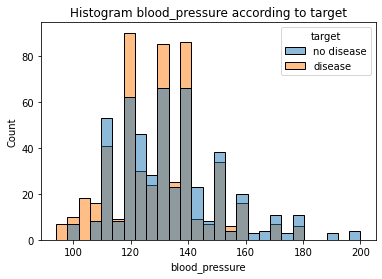

In [17]:
sns.histplot(x='blood_pressure',data=heart_disease2,hue='target')
plt.title('Histogram blood_pressure according to target')
plt.show()

Pasien yang memiliki tekanan darah lebih dari 120 dan kurang dari 140 banyak yg terkena penyakit jantung

### Histogram thalach according to target

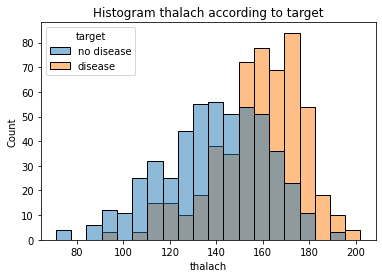

In [18]:
sns.histplot(x='thalach',data=heart_disease2,hue='target')
plt.title('Histogram thalach according to target')
plt.show()

pasien yang terkena penyakit jantung banyak yang memilik thalach > 140

### Histogram oldpeak according to target

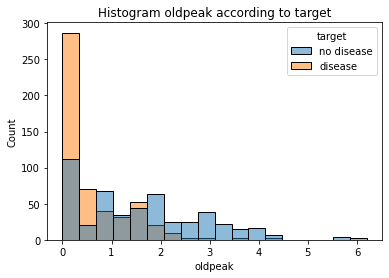

In [19]:
sns.histplot(x='oldpeak',data=heart_disease2,hue='target')
plt.title('Histogram oldpeak according to target')
plt.show()

oldpeak dari 0 sampai 1 lebih banyak yang terkena penyakit jantung

### Heatmap Correlation Matrix

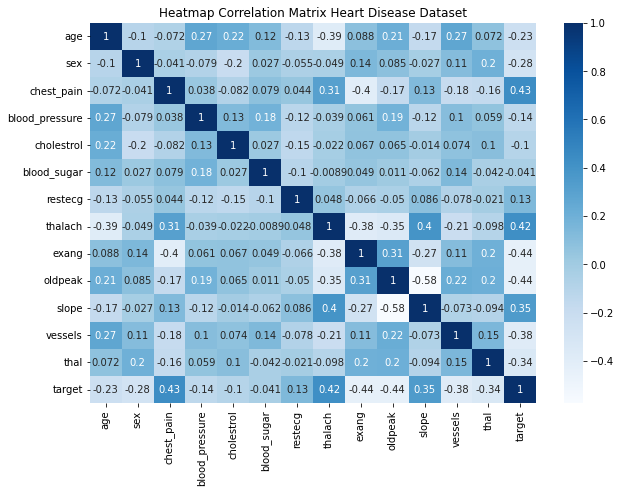

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(heart_disease.corr(),annot=True,cmap='Blues')
plt.title('Heatmap Correlation Matrix Heart Disease Dataset')
plt.show()

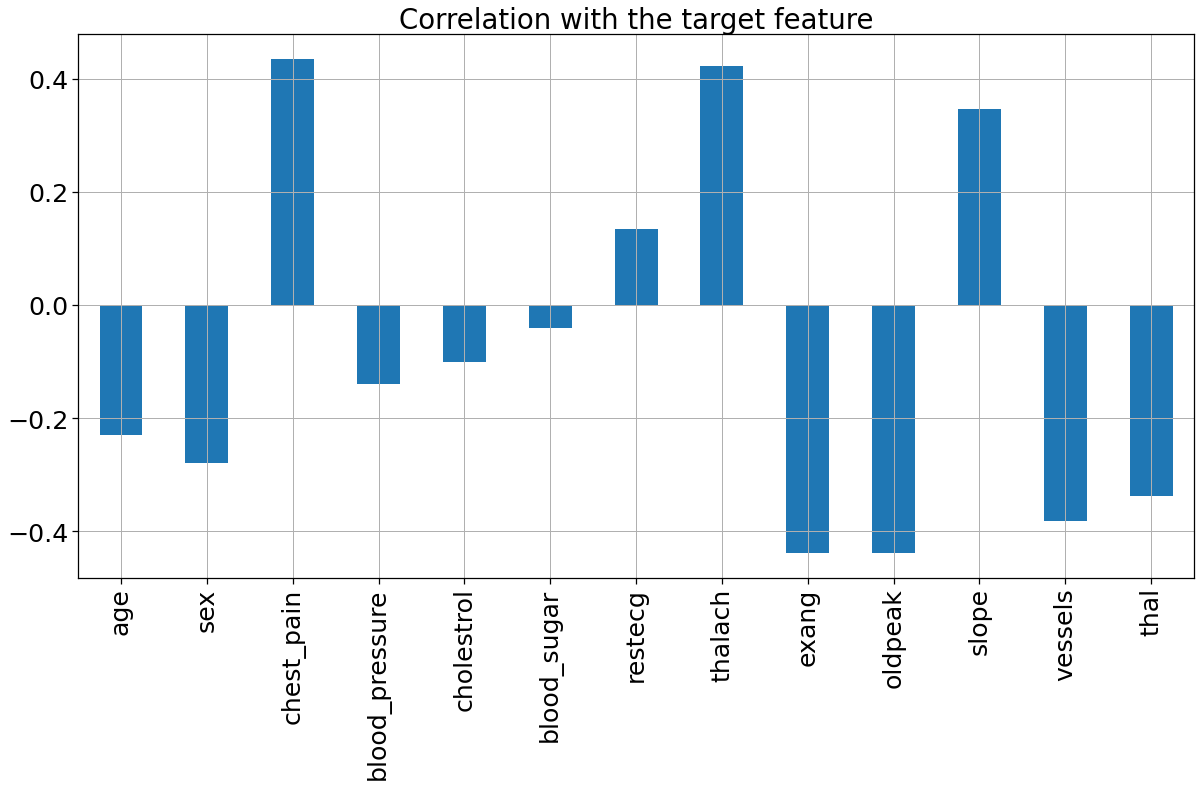

In [21]:
sns.set_context('notebook',font_scale = 2.3)
heart_disease.drop('target', axis=1).corrwith(heart_disease.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.show()

Nilai korelasi terhadap target dari 14 data hanya ada 4 data yang bernilai positif, yaitu chest_pain, restecg,thalach, dan slope. Dari ke-4 data tersebut adalah yang paling mepengaruhi pasien menderati penyakit jantung

# Exploratory Data Analysis(EDA)

### Periksa statistika deskriptif dari dataset

In [22]:
heart_disease.describe()

,age,sex,chest_pain,blood_pressure,cholestrol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
heart_disease['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

### Periksa total data duplikat dari dataset

In [24]:
heart_disease.duplicated().sum()

723

### Hapus data duplikat dari dataset

In [25]:
heart_disease = heart_disease.drop_duplicates()
heart_disease

,age,sex,chest_pain,blood_pressure,cholestrol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [26]:
#Cari categorical data dan numerical datanya
categorical_data = []
numerical_data = []
for column in heart_disease.columns:
    if (len(heart_disease[column].unique())) <= 10:
        categorical_data.append(column)
    else:
        numerical_data.append(column)

In [27]:
print(categorical_data)

['sex', 'chest_pain', 'blood_sugar', 'restecg', 'exang', 'slope', 'vessels', 'thal', 'target']


In [28]:
print(numerical_data)

['age', 'blood_pressure', 'cholestrol', 'thalach', 'oldpeak']


# Preprocessing for Modelling

In [29]:
from sklearn.model_selection import train_test_split   # To split train val test set
from sklearn.pipeline import Pipeline      # To create pipeline for data transformation
from sklearn.preprocessing import StandardScaler,MinMaxScaler     # To standardize the data
from sklearn.metrics import accuracy_score    # To calculate the accuracy

### One Hot Encoder

In [30]:
categorical_data.remove('target')
dataset = pd.get_dummies(heart_disease, columns=categorical_data)
dataset

,age,blood_pressure,cholestrol,thalach,oldpeak,target,sex_0,sex_1,chest_pain_0,chest_pain_1,...,slope_2,vessels_0,vessels_1,vessels_2,vessels_3,vessels_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
733,44,108,141,175,0.6,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
739,52,128,255,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
843,59,160,273,125,0.0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


### Normalization Data

Digunakan agar rentang nilai dari numerical_data tidak jauh dengan target

In [31]:
ss = StandardScaler()
columns_to_scale = numerical_data
dataset[columns_to_scale] = ss.fit_transform(dataset[columns_to_scale])
dataset

,age,blood_pressure,cholestrol,thalach,oldpeak,target,sex_0,sex_1,chest_pain_0,chest_pain_1,...,slope_2,vessels_0,vessels_1,vessels_2,vessels_3,vessels_4,thal_0,thal_1,thal_2,thal_3
0,-0.267966,-0.376556,-0.667728,0.806035,-0.037124,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.157260,0.478910,-0.841918,0.237495,1.773958,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.724733,0.764066,-1.403197,-1.074521,1.342748,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.728383,0.935159,-0.841918,0.499898,-0.899544,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.839089,0.364848,0.919336,-1.905464,0.739054,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,-0.661712,-0.687083,-1.511859,0.394086,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,-1.346085,-2.041893,1.112172,-0.382092,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,-0.205463,0.164513,0.499898,-0.899544,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
843,0.506972,1.619532,0.512893,-1.074521,-0.899544,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


### Tentukan variabel X dan Y dari data yang akan ditrain_test_split

In [32]:
X_data = dataset.drop('target',axis=1)
Y_data = dataset.target

### Train test split untuk memisahkan data menjadi 3 bagian, yaitu train data, validation data, dan testing data

In [33]:
X, X_test, y, y_test = train_test_split(X_data,Y_data,test_size=0.3,random_state=24,stratify=Y_data)
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3,random_state=24,stratify=y)

# Machine Learning and Evaluation

### K-Nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier
for n in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    y_prediction = knn.predict(X_valid)
    print(n, 'acc=', accuracy_score(y_valid,y_prediction))

1 acc= 0.71875
2 acc= 0.671875
3 acc= 0.78125
4 acc= 0.75
5 acc= 0.828125
6 acc= 0.84375
7 acc= 0.859375
8 acc= 0.859375
9 acc= 0.84375
10 acc= 0.828125
11 acc= 0.859375


### Logistic Regression

In [35]:
# Train with Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=150)
lr.fit(X_train, y_train)

prediction = lr.predict(X_valid)
print(accuracy_score(prediction, y_valid))

0.84375


### Decision Tree

In [36]:
# Train with Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=24)
dt.fit(X_train, y_train)

prediction = dt.predict(X_valid)
print(accuracy_score(prediction, y_valid))

0.703125


In [37]:
# Hyperparameter with Decision Tree
max_depth = range(1, 15)
max_leaf_nodes = range(10, 100, 5)
for depth in max_depth:
    for leaf in max_leaf_nodes:
        dt = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=leaf, random_state=24)
        dt.fit(X_train, y_train)

        prediction = dt.predict(X_valid)
        print("Depth: {}, Leaf: {}, Acc: {}".format(depth, leaf, accuracy_score(prediction, y_valid)))

Depth: 1, Leaf: 10, Acc: 0.703125
Depth: 1, Leaf: 15, Acc: 0.703125
Depth: 1, Leaf: 20, Acc: 0.703125
Depth: 1, Leaf: 25, Acc: 0.703125
Depth: 1, Leaf: 30, Acc: 0.703125
Depth: 1, Leaf: 35, Acc: 0.703125
Depth: 1, Leaf: 40, Acc: 0.703125
Depth: 1, Leaf: 45, Acc: 0.703125
Depth: 1, Leaf: 50, Acc: 0.703125
Depth: 1, Leaf: 55, Acc: 0.703125
Depth: 1, Leaf: 60, Acc: 0.703125
Depth: 1, Leaf: 65, Acc: 0.703125
Depth: 1, Leaf: 70, Acc: 0.703125
Depth: 1, Leaf: 75, Acc: 0.703125
Depth: 1, Leaf: 80, Acc: 0.703125
Depth: 1, Leaf: 85, Acc: 0.703125
Depth: 1, Leaf: 90, Acc: 0.703125
Depth: 1, Leaf: 95, Acc: 0.703125
Depth: 2, Leaf: 10, Acc: 0.71875
Depth: 2, Leaf: 15, Acc: 0.71875
Depth: 2, Leaf: 20, Acc: 0.71875
Depth: 2, Leaf: 25, Acc: 0.71875
Depth: 2, Leaf: 30, Acc: 0.71875
Depth: 2, Leaf: 35, Acc: 0.71875
Depth: 2, Leaf: 40, Acc: 0.71875
Depth: 2, Leaf: 45, Acc: 0.71875
Depth: 2, Leaf: 50, Acc: 0.71875
Depth: 2, Leaf: 55, Acc: 0.71875
Depth: 2, Leaf: 60, Acc: 0.71875
Depth: 2, Leaf: 65, Acc: 

Akurasi tertinggi ada pada Depth:14, Leaf:15, Acc:0.75

In [38]:
dt = DecisionTreeClassifier(max_depth=14, max_leaf_nodes=80, random_state=24)
dt.fit(X_train, y_train)
prediction = dt.predict(X_test)
accuracy_score(prediction, y_test)

0.7472527472527473

### Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
prediction = gnb.predict(X_valid)
print(accuracy_score(y_valid,prediction))

0.671875


### Support Vector Machine

In [40]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
prediction = svc.predict(X_valid)
print(accuracy_score(y_valid,prediction))

0.828125


Hasil ML terbaik pakai K-Nearest Neighbors dengan n=11, yaitu 0.859